In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlsxwriter
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Load the workbook
workbookPath = 'BOH1/Copy of BOH1 Sim Yvonne Zhang 2024_June 5, 2024_20.01.xlsx'

#get file name
file_name = os.path.basename(workbookPath)
file_name = os.path.splitext(file_name)[0]
dir_name = os.path.dirname(workbookPath)
workbook = openpyxl.load_workbook(workbookPath, data_only=True)
sheets = workbook.sheetnames
# sheet = workbook['Sheet0']

# # Read data into a pandas DataFrame
# data = sheet.values
# # Get the first row of headers (to be skipped)
# # next(data)
# # Get the second row as headers
# columns = next(data)

# Create the DataFrame
# df_ = pd.DataFrame(data, columns=columns)

# read the workbook into a pandas DataFrame
df_ = pd.read_excel(workbookPath, sheet_name=sheets[0])  
df_ = df_.drop(index=0)

# Conditions for filtering
nameColF = 'Q1.4'
nameColG = 'Q1.3'
condition1 = (df_[nameColG] == 'Fake') & (df_[nameColF] == 'Person')
condition2 = df_[nameColG].isna() | df_[nameColF].isna()
condition3 = df_[nameColG].eq('') | df_[nameColF].eq('')
condition4 = (df_[nameColG] == 'Test') | (df_[nameColF] == 'McTest')
conditon5 = df_[nameColG].str.contains('test') | df_[nameColF].str.contains('test')

# Combine all conditions using OR
combined_condition = condition1 | condition2 | condition3 | condition4 | conditon5

# Filter the DataFrame
df_ = df_[~combined_condition]
df_.head(2)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.6_111_TEXT,Q1.7,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q2.2_5,Q2.2_6,Q2.2_7,Q2.2_8,Q2.2_9,Q2.2_10,Q2.2_11,Q2.5,Q2.6,Q3.1,Q3.2,Q3.3,Q3.4,Q390,Q3.6_Id,Q3.6_Name,Q3.6_Size,Q3.6_Type,gname,fname,uomid,circuit
1,2024-06-03 23:10:17,2024-06-03 23:11:19,Survey Preview,NaN,100,62,True,2024-06-03 23:11:20.526000,R_4EfBOhLtX4IGLuV,NaN,NaN,NaN,NaN,-37.87,145.0657,preview,EN,4 Jun 2024,Matt,Test,123456,Other,Prof. Test,"Yes, student attended",Completed,Completed,Completed,Not completed,Not completed,Not completed,Completed,Completed,Not completed,Not completed,Completed,Yes,NaN,Lvl 2: Reaches a step (or point) in the proced...,Lvl 1: Attends the clinic or simulation clinic.,Lvl 4: Student can be trusted to perform this ...,asfasd,asdf,F_3eeNO9YLbfLfPBh,signature.png,12776,image/png,NaN,NaN,NaN,NaN
2,2024-06-04 23:40:32,2024-06-04 23:43:47,IP Address,61.69.124.49,100,195,True,2024-06-04 23:43:48.799000,R_492jqJv0x26NIgp,NaN,NaN,NaN,NaN,-37.8159,144.9669,anonymous,EN,5 Jun 2024,Daniella,Icho Malak,1146177,Laura James,NaN,"Yes, student attended",Completed,Not completed,Completed,Completed,Completed,Completed,Not completed,Not completed,Not completed,Completed,Completed,No,NaN,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Cavity prep overextended especially on the DB....,NaN,F_1gBeYQ6hHJtSjKo,signature.png,8781,image/png,Daniella,Icho Malak,1146177,NaN


Change the name of columns to something readable

In [2]:
df = df_.copy()
# collect student id and examiner for empty Q3.6_Id
df['Q3.6_Id'] = df['Q3.6_Id'].fillna('')
df['Q3.6_Id'] = df['Q3.6_Id'].replace(' ', '')
df['Q3.6_Id'] = df['Q3.6_Id'].replace('  ', '')
emptyQ3_6 = df[df['Q3.6_Id'].eq('')][['uomid', 'Q1.7']]
print(emptyQ3_6.head(2)) 
# drop the columns with nan or empty in Q3.6_Id
df = df[~df['Q3.6_Id'].eq('')]
code1 = '513'
code2 = '577'

# # 524 and 578
# quesLabelDict = {
#     f'Q2.8_2': f'{code1}_MC1', f'Q2.8_3': f'{code1}_MC2', f'Q2.8_4': f'{code1}_MC3', f'Q2.8_5': f'{code1}_MC4', f'Q2.8_6': f'{code1}_MC5', f'Q2.8_7': f'{code1}_MC6',  
#     f'Q2.10_1': f'{code2}_MC1', f'Q2.10_2': f'{code2}_MC2', f'Q2.10_3': f'{code2}_MC3',
#     f'Q2.11': f'{code1}_CE', 'Q3.1': 'TM', 'Q3.2': 'PS', 'Q3.3': 'ES',
#     'Q1.7': 'Examiner', 'Q1.5': 'StudentID', 'Duration (in seconds)': 'Duration', 'Progress': 'Progress', 
#     'Finished': 'Finished', 'RecordedDate': 'Date', 'Q3.4': 'Comments'
# }

# tooth36, 513 and 577
quesLabelDict = {
    f'Q2.2_1': f'{code1}_MC1', f'Q2.2_2': f'{code1}_MC2', f'Q2.2_3': f'{code1}_MC3', f'Q2.2_4': f'{code1}_MC4', f'Q2.2_5': f'{code1}_MC5', f'Q2.2_6': f'{code1}_MC6', f'Q2.2_7': f'{code1}_MC7', f'Q2.2_8': f'{code1}_MC8', f'Q2.2_9': f'{code1}_MC9',
    f'Q2.4_1': f'{code2}_MC1', 'Q2.4_2': f'{code2}_MC2',
    f'Q2.5': f'{code1}_CE',
    'Q3.1': 'TM', 'Q3.2': 'PS', 'Q3.3': 'ES',
    'Q1.7': 'Examiner', 'Q1.5': 'StudentID', 'Duration (in seconds)': 'Duration', 'Progress': 'Progress', 
    'Finished': 'Finished', 'Q1.2': 'Date', 'Q3.4': 'Comments'
}

#tooth37 , 513 and 577
quesLabelDict = {
    f'Q2.8_1': f'{code1}_MC1', f'Q2.8_2': f'{code1}_MC2', f'Q2.8_3': f'{code1}_MC3', f'Q2.8_4': f'{code1}_MC4', f'Q2.8_5': f'{code1}_MC5', f'Q2.8_6': f'{code1}_MC6', 
    f'Q2.10_1': f'{code2}_MC1', f'Q2.10_2': f'{code2}_MC2',
    f'Q2.11': f'{code1}_CE',
    'Q3.1': 'TM', 'Q3.2': 'PS', 'Q3.3': 'ES',
    'Q1.7': 'Examiner', 'Q1.5': 'StudentID', 'Duration (in seconds)': 'Duration', 'Progress': 'Progress', 
    'Finished': 'Finished', 'Q1.2': 'Date', 'Q3.4': 'Comments'
}
quesType = {
    'level': ['TM', 'PS', 'ES'],
    'yesNo':['534_CE', '524_CE'],
    'MC': [colname for colname in quesLabelDict.values() if 'MC' in colname],
}
df.rename(columns=quesLabelDict, inplace=True)
df.head()
df = df[list(quesLabelDict.values())]
df.head()
# # Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y').dt.date
print(df['Date'].unique())
# # Filter to keep only the rows where the date is '15 Apr 2024'
target_date = pd.Timestamp('2024-06-03').date()
# df = df[df['Date'] == target_date]

df[f'{code2}_CE'] = df[f'{code1}_CE']
print(len(df))
df.head(3)

Empty DataFrame
Columns: [uomid, Q1.7]
Index: []


KeyError: "['513_MC1', '513_MC2', '513_MC3', '513_MC4', '513_MC5', '513_MC6', '577_MC1', '577_MC2', '513_CE'] not in index"

Turn examiner name to initials

In [ ]:
# Function to convert names to initials
def get_initials(name):
    parts = name.split(' ')
    initials = ''.join([part[0].upper() for part in parts])
    return initials
# Apply the function to the 'Examiner' column
df['Examiner'] = df['Examiner'].apply(get_initials)

# Extract Level digits
df['TM'] = df['TM'].str.extract(r'Lvl (\d+)')
df['PS'] = df['PS'].str.extract(r'Lvl (\d+)')
df['ES'] = df['ES'].str.extract(r'Lvl (\d+)')
# Change values of completed tasks to 1.
df.replace({'Completed': 1, 'Not completed': 0}, inplace=True)
df.head(3)
df.head()

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,577_MC1,577_MC2,513_CE,TM,PS,ES,Examiner,StudentID,Duration,Progress,Finished,Date,Comments,577_CE
1,0,1,1,1,1,1,1,1,No,3,2,3,JA,1383423,129,100,True,2024-06-03,Small deficiencies at lingual and MB margins.,No
2,0,1,1,1,1,1,1,0,Yes,3,2,1,MJ,1083971,198,100,True,2024-06-03,Mesiobuccal marginal void greater than 1mm,Yes
3,1,1,0,1,1,1,0,1,No,3,2,3,GP,1082185,143,100,True,2024-06-03,Cusp bit low \nMb overcarved,No
4,1,1,0,1,1,1,0,1,No,3,2,3,MT,587525,105,100,True,2024-06-03,Ridge too high\nCusp not well formed\nGood con...,No
5,0,0,0,1,1,1,0,0,No,3,2,2,MT,1287253,116,100,True,2024-06-03,Lack of occlusal and marginal ridge anatomy\nM...,No


In [ ]:
df[f'{code1}_TM'] = df['TM']
df[f'{code1}_PS'] = df['PS']
df[f'{code1}_ES'] = df['ES']
df[f'{code2}_TM'] = df['TM']
df[f'{code2}_PS'] = df['PS']
df[f'{code2}_ES'] = df['ES']
df.drop(columns=['TM', 'PS', 'ES'], inplace=True)
comments = df.pop('Comments')
df['Comments'] = comments
df.head(3)

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,577_MC1,577_MC2,513_CE,Examiner,StudentID,Duration,Progress,Finished,Date,577_CE,513_TM,513_PS,513_ES,577_TM,577_PS,577_ES,Comments
1,0,1,1,1,1,1,1,1,No,JA,1383423,129,100,True,2024-06-03,No,3,2,3,3,2,3,Small deficiencies at lingual and MB margins.
2,0,1,1,1,1,1,1,0,Yes,MJ,1083971,198,100,True,2024-06-03,Yes,3,2,1,3,2,1,Mesiobuccal marginal void greater than 1mm
3,1,1,0,1,1,1,0,1,No,GP,1082185,143,100,True,2024-06-03,No,3,2,3,3,2,3,Cusp bit low \nMb overcarved


Create different dataframe for each examiner

In [ ]:
# filter the dataframe
df_merged = df.copy()
df_merged = df_merged.drop([ f'Progress', f'Finished', f'Duration', 'Date'], axis=1)
df_merged['Row Labels'] = df_merged['StudentID'].astype(str) + '_' + df_merged['Examiner'].astype(str)
# df_merged.set_index('index', inplace=True)
# Dictionary to hold each DataFrame
dfs = {}
# Splitting the DataFrame based on unique examiner values
for examiner in df_merged['Examiner'].unique():
    dfs[examiner] = df_merged[df_merged['Examiner'] == examiner]
examiners = df_merged['Examiner'].unique()

# Number of students checked by examiners
for examiner in examiners:
    print(f"Examiner {examiner}: {dfs[examiner].shape[0]}")



Examiner JA: 32
Examiner MJ: 32
Examiner GP: 34
Examiner MT: 64
Examiner EC: 32


In [ ]:
df_merged.head(15)

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,577_MC1,577_MC2,513_CE,Examiner,StudentID,577_CE,513_TM,513_PS,513_ES,577_TM,577_PS,577_ES,Comments,Row Labels
1,0,1,1,1,1,1,1,1,No,JA,1383423,No,3,2,3,3,2,3,Small deficiencies at lingual and MB margins.,1383423_JA
2,0,1,1,1,1,1,1,0,Yes,MJ,1083971,Yes,3,2,1,3,2,1,Mesiobuccal marginal void greater than 1mm,1083971_MJ
3,1,1,0,1,1,1,0,1,No,GP,1082185,No,3,2,3,3,2,3,Cusp bit low \nMb overcarved,1082185_GP
4,1,1,0,1,1,1,0,1,No,MT,587525,No,3,2,3,3,2,3,Ridge too high\nCusp not well formed\nGood con...,587525_MT
5,0,0,0,1,1,1,0,0,No,MT,1287253,No,3,2,2,3,2,2,Lack of occlusal and marginal ridge anatomy\nM...,1287253_MT
6,0,0,0,1,1,1,0,0,Yes,EC,1113227,Yes,3,2,1,3,2,1,Large void mesial\nAnatomy inaccurate,1113227_EC
7,1,1,0,1,1,1,0,1,No,MT,617915,No,3,2,3,3,2,3,Ridge slightly high and too far buccal\nCuspsl...,617915_MT
8,1,0,1,1,1,1,1,1,No,MJ,1069842,No,3,2,2,3,2,2,Bulky occlusal,1069842_MJ
9,1,1,0,1,0,1,1,1,No,JA,1387067,No,3,2,3,3,2,3,MB aspect of marginal ridge a bit bulky\nM ove...,1387067_JA
10,1,0,0,1,0,1,0,0,No,GP,1300764,No,3,2,3,3,2,3,Bumpy carving \nMb overh,1300764_GP


{'JA': {'577_CE': 7, '513_CE': 7}, 'MJ': {'577_CE': 4, '513_CE': 4}, 'GP': {'577_CE': 0, '513_CE': 0}, 'MT': {'577_CE': 7, '513_CE': 7}, 'EC': {'577_CE': 2, '513_CE': 2}}


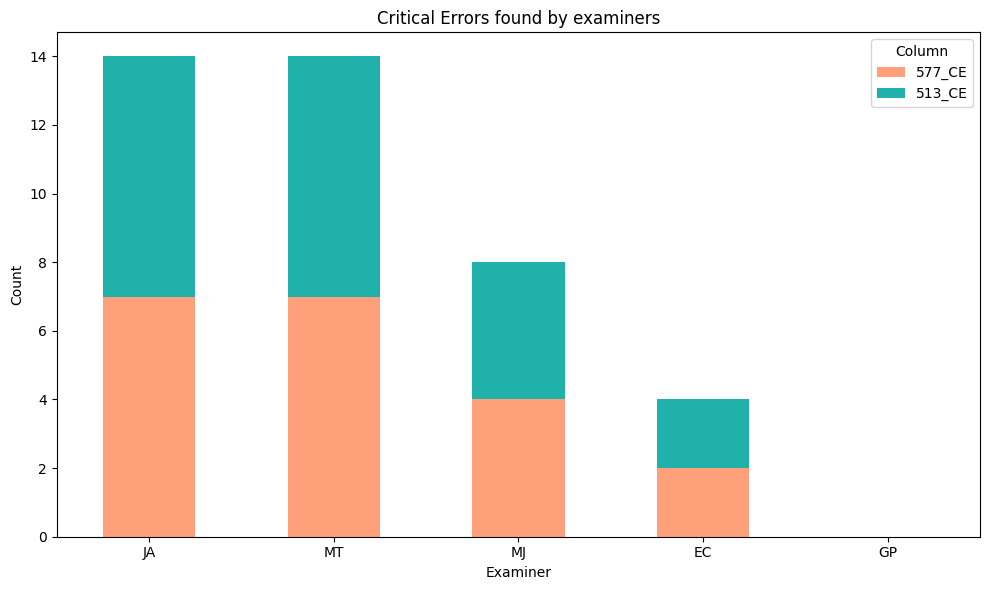

In [ ]:
# Count 'Yes' in specific columns for each examiner
yes_counts = {}
for examiner, dataframe in dfs.items():
    count_524_ce = dataframe[f'{code2}_CE'].value_counts().get('Yes', 0)
    count_534_ce = dataframe[f'{code1}_CE'].value_counts().get('Yes', 0)
    yes_counts[examiner] = {f'{code2}_CE': count_524_ce, f'{code1}_CE': count_534_ce}

# Display the counts
print(yes_counts)
counts_df = pd.DataFrame.from_dict(yes_counts, orient='index')
counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)
counts_df.drop(columns='Total', inplace=True)  # Drop the total as it's no longer needed for plotting

# Plotting
ax=counts_df.plot(kind='bar', figsize=(10, 6), color=['#FFA07A', '#20B2AA'], rot=0, stacked=True)
plt.title('Critical Errors found by examiners')
plt.xlabel('Examiner')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Column')
plt.tight_layout()
# Annotating numbers on top of each bar
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Get the stats, for total only MC values are considered

In [ ]:
import os
from openpyxl import load_workbook
def get_column_letter(col_idx):
        column = ""
        while col_idx > 0:
            col_idx, remainder = divmod(col_idx - 1, 26)
            column = chr(65 + remainder) + column
        return column

def saveDf(df, path, sheet_name):
    writer = pd.ExcelWriter(path, engine='xlsxwriter')  
    df.to_excel(writer, sheet_name=sheet_name, index=True)
    workbook  = writer.book                 # Get the xlsxwriter workbook and worksheet objects.
    worksheet = writer.sheets[sheet_name]

    # Define a format object for red color fill with XlsxWriter.
    red_format = workbook.add_format({'bg_color': '#FFC7CE', 'font_color': '#CF2D06'})
    ce524_format = workbook.add_format({'bg_color': '#D7BDE2', 'font_color': '#000000'}) #purple
    

    # Apply the format based on a conditional rule (cell value == 1).
    for idx, col in enumerate(df.columns, 1):
        column_letter = get_column_letter(idx)
        # print(column_letter)
        worksheet.conditional_format(f'{column_letter}2:{column_letter}{len(df)+1}', {
            'type': 'cell',
            'criteria': '=',
            'value': 1,
            'format': red_format
        })
        
    # Conditional formatting whether CE is Yes in 534 or 524
    num_cols = len(df.columns)
    column_letters = [get_column_letter(i+1) for i in range(num_cols)]
    for row_idx in range(2, len(df) + 2):  # Adjust for header and 1-based indexing
        # Format condition to check in specified columns
        # print(get_column_letter(df.columns.get_loc("534_CE") + 1), get_column_letter(df.columns.get_loc("524_CE") + 1))
        condition_524 = f'OR(${get_column_letter(df.columns.get_loc(f"{code1}_CE") + 2)}{row_idx}="Yes", ${get_column_letter(df.columns.get_loc(f"{code2}_CE") + 2)}{row_idx}="Yes")'
        print(row_idx, condition_524)
        columnLetter = get_column_letter(df.columns.get_loc(f"{code1}_CE") + 2)
        # Apply formatting to the whole row
        worksheet.conditional_format(f'{column_letters[0]}{row_idx}', {
            'type': 'formula',
            'criteria': condition_524,
            'format': ce524_format
        })
        worksheet.conditional_format(f'{columnLetter}{row_idx}:{column_letters[-1]}{row_idx}', {
            'type': 'formula',
            'criteria': condition_524,
            'format': ce524_format
        })
    writer.close()

In [ ]:

df = df_merged
# def vectoriseColumn(columnName):
#     df[columnName] = df[columnName].fillna(0).astype(int)
#     for i in range(1, 5):
#         df[f'{columnName}-{i}'] = (df[columnName] >= i).astype(int)
def vectoriseColumn(columnName, df):
    df[columnName] = df[columnName].fillna(0).astype(int)
    maxColValue = df[columnName].max()
    for i in range(1, maxColValue + 1):
        df[f'{columnName}-{i}'] = (df[columnName] >= i).astype(int)
# Vectorise columns
vectoriseColumn(f'{code1}_ES', df)
vectoriseColumn(f'{code1}_PS', df)
vectoriseColumn(f'{code1}_TM', df)
vectoriseColumn(f'{code2}_ES', df)
vectoriseColumn(f'{code2}_PS', df)
vectoriseColumn(f'{code2}_TM', df)

# Drop the specified columns
df = df.drop([f'{code1}_ES', f'{code1}_PS', f'{code1}_TM', f'{code2}_ES', f'{code2}_PS', f'{code2}_TM'], axis=1)

# Collect columns of specific type
cols_code1_mc = df.filter(regex=f'^{code1}_MC').columns
cols_code2_mc = df.filter(regex=f'^{code2}_MC').columns
cols_code1_tm = df.filter(regex=f'^{code1}_TM').columns
cols_code2_tm = df.filter(regex=f'^{code2}_TM').columns
cols_code1_es = df.filter(regex=f'^{code1}_ES').columns
cols_code2_es = df.filter(regex=f'^{code2}_ES').columns
cols_code1_ps = df.filter(regex=f'^{code1}_PS').columns
cols_code2_ps = df.filter(regex=f'^{code2}_PS').columns

# Combine column lists
mc_columns = cols_code1_mc.tolist() + cols_code2_mc.tolist()
calc_columns = mc_columns + cols_code1_tm.tolist() + cols_code2_tm.tolist() + cols_code1_es.tolist() + cols_code2_es.tolist() + cols_code1_ps.tolist() + cols_code2_ps.tolist()
print(calc_columns)
# df.head()
# Calculate 'Grand Total' and 'Grand Total MC'
df['Grand Total'] = df[calc_columns].sum(axis=1, skipna=True)
df['Grand Total MC'] = df[mc_columns].sum(axis=1, skipna=True)

# Sort values by 'Grand Total'
df = df.sort_values(by='Grand Total', ascending=False)

# Set index to 'Row Labels'
df.set_index('Row Labels', inplace=True)

# Calculate column totals
column_totals = df[calc_columns].sum(skipna=True)
df.loc['Column Total'] = pd.Series(column_totals, index=calc_columns)

# Sort columns by 'Column Total'
df = df.sort_values(by='Column Total', axis=1, ascending=False)

# Get unique student IDs
ce_code2 = df[df[f'{code2}_CE'] == 'Yes']['StudentID'].unique
ce_code1 = df[df[f'{code1}_CE'] == 'Yes']['StudentID'].unique
comments = df.pop('Comments')
df['Comments'] = comments
# print(f"CE 524: {ce_524}")
# print(f"CE 534: {ce_534}")
df.tail()


['513_MC1', '513_MC2', '513_MC3', '513_MC4', '513_MC5', '513_MC6', '577_MC1', '577_MC2', '513_TM-1', '513_TM-2', '513_TM-3', '577_TM-1', '577_TM-2', '577_TM-3', '513_ES-1', '513_ES-2', '513_ES-3', '577_ES-1', '577_ES-2', '577_ES-3', '513_PS-1', '513_PS-2', '577_PS-1', '577_PS-2']


,577_TM-3,513_PS-1,577_TM-2,577_TM-1,577_PS-1,577_ES-1,513_TM-3,513_ES-1,513_TM-2,513_TM-1,577_PS-2,513_PS-2,513_MC6,513_MC4,513_ES-2,577_ES-2,513_MC5,513_MC1,513_MC2,577_MC2,513_ES-3,577_ES-3,577_MC1,513_MC3,513_CE,Examiner,StudentID,577_CE,Grand Total,Grand Total MC,Comments
Row Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
985199_JA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,JA,985199.0,Yes,15.0,3.0,Large lingual marginal void and MB deficient
1232770_MT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,MT,1232770.0,No,15.0,3.0,Flat cusp\nVery poor anatomy\nNegative edge ML...
1180737_EC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Yes,EC,1180737.0,Yes,15.0,3.0,Mesial void and open contact
1402039_JA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,JA,1402039.0,Yes,14.0,2.0,Large MB deficiency\nAlso deficiency on occlus...
Column Total,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,193.0,193.0,191.0,191.0,177.0,177.0,141.0,129.0,99.0,98.0,94.0,94.0,69.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_save_full = df.drop(columns=['StudentID', 'Examiner'], errors='ignore')
# get filename without extension
file_name = os.path.basename(workbookPath)
file_name = os.path.splitext(file_name)[0]
print(file_name)
dir_name = os.path.dirname(workbookPath)
saveDf(df_save_full, f'{dir_name}/{file_name} filtered.xlsx', 'Full')

DDS2 Cons Dent Assessment - Exam 2 May_June 3, 2024_16.12 tooth37
2 OR($Z2="Yes", $AA2="Yes")
3 OR($Z3="Yes", $AA3="Yes")
4 OR($Z4="Yes", $AA4="Yes")
5 OR($Z5="Yes", $AA5="Yes")
6 OR($Z6="Yes", $AA6="Yes")
7 OR($Z7="Yes", $AA7="Yes")
8 OR($Z8="Yes", $AA8="Yes")
9 OR($Z9="Yes", $AA9="Yes")
10 OR($Z10="Yes", $AA10="Yes")
11 OR($Z11="Yes", $AA11="Yes")
12 OR($Z12="Yes", $AA12="Yes")
13 OR($Z13="Yes", $AA13="Yes")
14 OR($Z14="Yes", $AA14="Yes")
15 OR($Z15="Yes", $AA15="Yes")
16 OR($Z16="Yes", $AA16="Yes")
17 OR($Z17="Yes", $AA17="Yes")
18 OR($Z18="Yes", $AA18="Yes")
19 OR($Z19="Yes", $AA19="Yes")
20 OR($Z20="Yes", $AA20="Yes")
21 OR($Z21="Yes", $AA21="Yes")
22 OR($Z22="Yes", $AA22="Yes")
23 OR($Z23="Yes", $AA23="Yes")
24 OR($Z24="Yes", $AA24="Yes")
25 OR($Z25="Yes", $AA25="Yes")
26 OR($Z26="Yes", $AA26="Yes")
27 OR($Z27="Yes", $AA27="Yes")
28 OR($Z28="Yes", $AA28="Yes")
29 OR($Z29="Yes", $AA29="Yes")
30 OR($Z30="Yes", $AA30="Yes")
31 OR($Z31="Yes", $AA31="Yes")
32 OR($Z32="Yes", $AA32="Yes

In [ ]:
c1 = calc_columns.copy()
c1.append('StudentID')
c1.append(f'{code1}_CE')
c1.append(f'{code2}_CE')
c1.append('Comments')
# below is to take the best value for df 
df_best = df[c1]
# Step 1: Identify disagreements for each code and create new columns
df_best['Disagreement_Code1'] = df_best.groupby('StudentID')[f'{code1}_CE'].transform(lambda x: x.nunique() > 1)
df_best['Disagreement_Code2'] = df_best.groupby('StudentID')[f'{code2}_CE'].transform(lambda x: x.nunique() > 1)

# Step 3: Store the rows with disagreements in a separate DataFrame
disagreed_rows = df_best[df_best['Disagreement_Code1'] | df_best['Disagreement_Code2']]

# Step 2: Update the critical error columns to 'Yes' if any of the rows for a student have 'Yes'
df_best[f'{code1}_CE'] = df_best.groupby('StudentID')[f'{code1}_CE'].transform(lambda x: 'Yes' if 'Yes' in x.values else 'No')
df_best[f'{code2}_CE'] = df_best.groupby('StudentID')[f'{code2}_CE'].transform(lambda x: 'Yes' if 'Yes' in x.values else 'No')


# Custom aggregation function to concatenate comments
def concatenate_comments(series):
    return ';\n\n '.join(series.dropna().astype(str))

# Group by StudentID and apply the aggregation functions
# Use a dictionary comprehension to set 'max' for all columns except 'Comments'
aggregation_functions = {col: 'max' for col in df_best.columns if col != 'Comments' or col!='StudentID'}
aggregation_functions['Comments'] = concatenate_comments
aggregation_functions['StudentID'] = 'first'
# Apply the aggregation
df_best = df_best.groupby('StudentID').agg(aggregation_functions)#.reset_index(drop=True)

# df_best = df_best.groupby('StudentID').max().reset_index() # take best value
# import ace_tools as tools; tools.display_dataframe_to_user(name="Disagreed Rows", dataframe=disagreed_rows)

# df = df_best
# df_best.head()
# resultDf = resultDf.drop([dropcol], axis=1)
df_best['Grand Total'] = df_best[calc_columns].sum(axis=1, skipna=True)
df_best = df_best.sort_values(by='Grand Total', ascending=False)
df_best['StudentID'] = df_best['StudentID'].astype(int)
df_best.set_index('StudentID', inplace=True)
# df = df.drop(['Examiner', 'Row Labels'], axis=1)

# calculating a column total
column_totals = df_best[calc_columns].sum(skipna=True)  # Sum each column, ignoring NaN
df_best.loc['Column Total'] = pd.Series(column_totals, index=calc_columns)
df_best = df_best.sort_values(by='Column Total', axis=1, ascending=False)
df_best.pop('Disagreement_Code1')
df_best.pop('Disagreement_Code2')
comments = df_best.pop('Comments')
df_best['Comments'] = comments
saveDf(df_best, f'{dir_name}/{file_name} filtered_best.xlsx', 'Best')
df_best.tail()

2 OR($Z2="Yes", $AA2="Yes")
3 OR($Z3="Yes", $AA3="Yes")
4 OR($Z4="Yes", $AA4="Yes")
5 OR($Z5="Yes", $AA5="Yes")
6 OR($Z6="Yes", $AA6="Yes")
7 OR($Z7="Yes", $AA7="Yes")
8 OR($Z8="Yes", $AA8="Yes")
9 OR($Z9="Yes", $AA9="Yes")
10 OR($Z10="Yes", $AA10="Yes")
11 OR($Z11="Yes", $AA11="Yes")
12 OR($Z12="Yes", $AA12="Yes")
13 OR($Z13="Yes", $AA13="Yes")
14 OR($Z14="Yes", $AA14="Yes")
15 OR($Z15="Yes", $AA15="Yes")
16 OR($Z16="Yes", $AA16="Yes")
17 OR($Z17="Yes", $AA17="Yes")
18 OR($Z18="Yes", $AA18="Yes")
19 OR($Z19="Yes", $AA19="Yes")
20 OR($Z20="Yes", $AA20="Yes")
21 OR($Z21="Yes", $AA21="Yes")
22 OR($Z22="Yes", $AA22="Yes")
23 OR($Z23="Yes", $AA23="Yes")
24 OR($Z24="Yes", $AA24="Yes")
25 OR($Z25="Yes", $AA25="Yes")
26 OR($Z26="Yes", $AA26="Yes")
27 OR($Z27="Yes", $AA27="Yes")
28 OR($Z28="Yes", $AA28="Yes")
29 OR($Z29="Yes", $AA29="Yes")
30 OR($Z30="Yes", $AA30="Yes")
31 OR($Z31="Yes", $AA31="Yes")
32 OR($Z32="Yes", $AA32="Yes")
33 OR($Z33="Yes", $AA33="Yes")
34 OR($Z34="Yes", $AA34="Yes")
3

,577_TM-2,513_TM-3,577_PS-1,513_PS-2,513_PS-1,577_ES-1,513_ES-1,577_TM-3,577_TM-1,577_PS-2,513_TM-2,513_TM-1,513_MC6,513_MC4,513_ES-2,577_ES-2,513_MC5,513_MC1,513_MC2,513_ES-3,577_ES-3,577_MC2,577_MC1,513_MC3,513_CE,577_CE,Grand Total,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1377158,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,16.0,Large lingual deficiency\nMultiple porosities\...
1232770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,Large deficiencies at lingual and occlusal mar...
985199,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,Open lingual margin;\n\n Large lingual margina...
1113227,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,Large void mesial\nAnatomy inaccurate;\n\n Ver...
Column Total,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,93.0,93.0,85.0,80.0,72.0,72.0,72.0,65.0,55.0,48.0,NaN,NaN,NaN,NaN


           Average  Std Deviation  count
Examiner                                
EC        5.250000       1.191367     32
GP        4.676471       1.386528     34
JA        4.968750       1.674946     32
MJ        6.156250       1.194325     32
MT        4.609375       1.589821     64


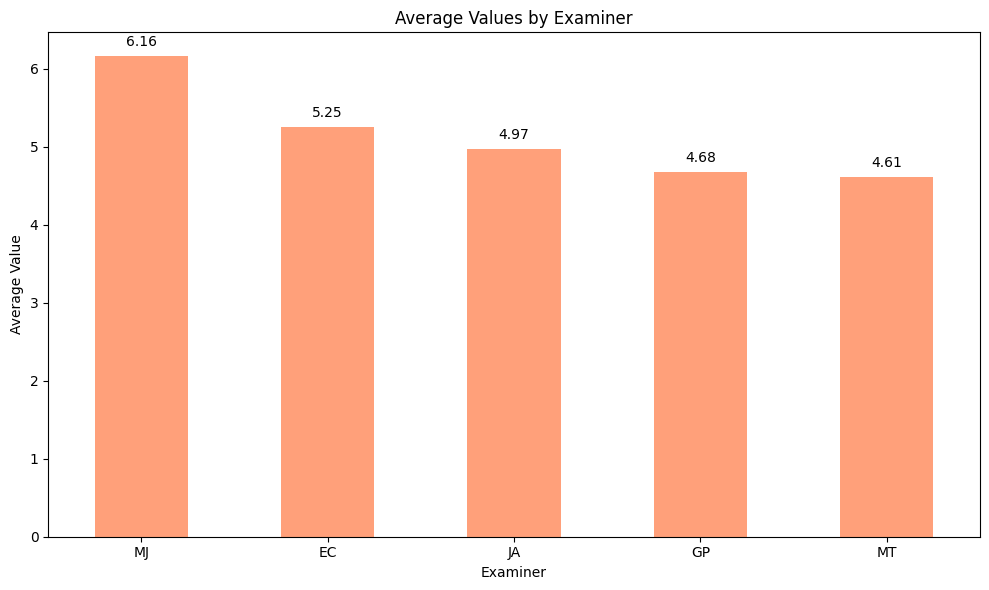

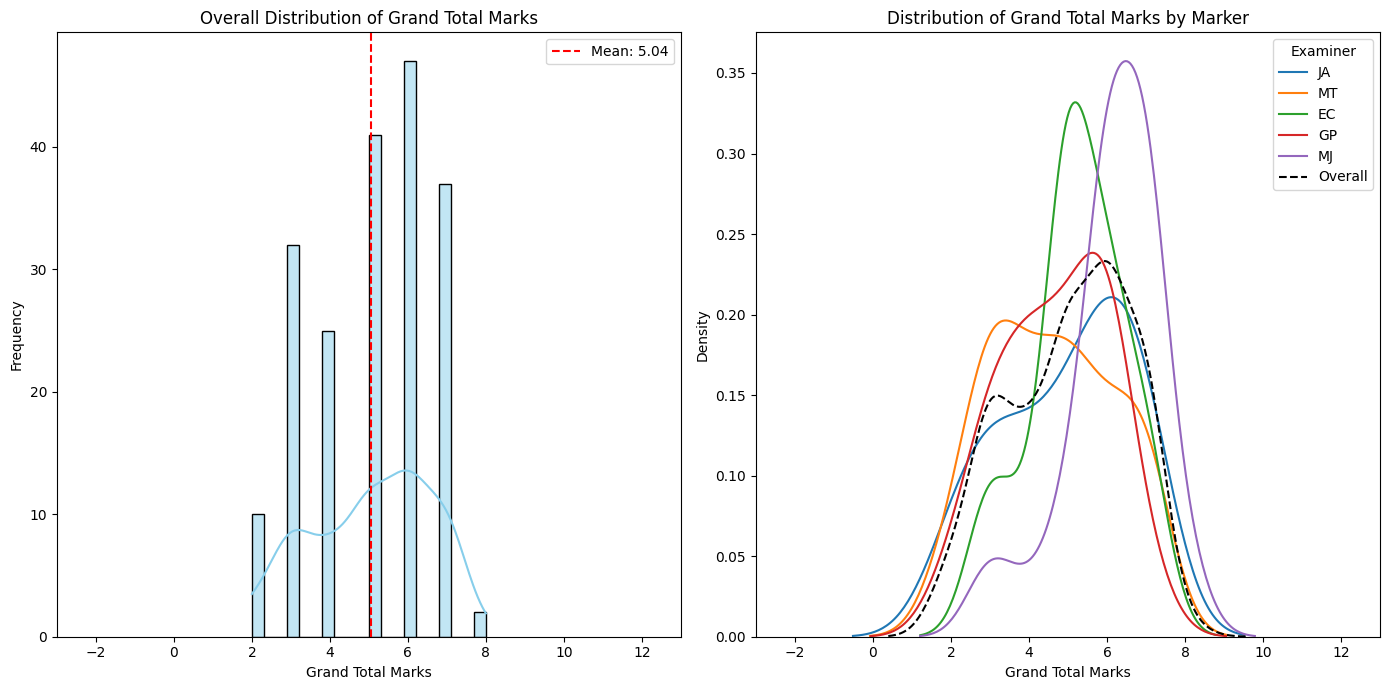

['JA' 'MT' 'EC' 'GP' 'MJ']


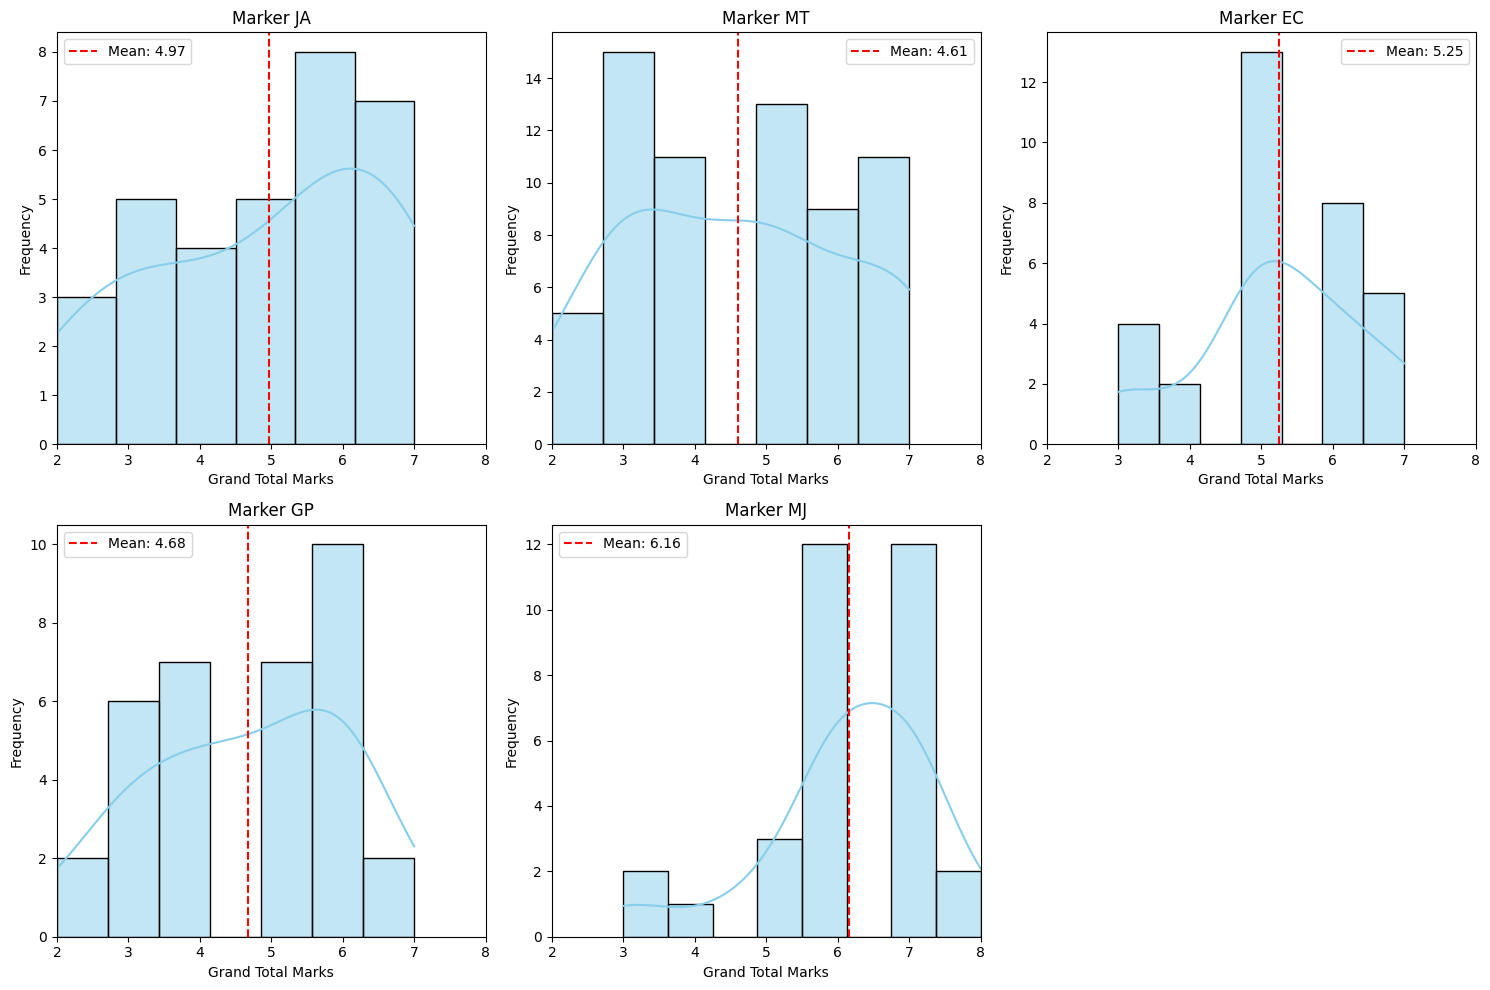

            Average  Std Deviation  count
Examiner                                 
EC        19.750000       2.184993     32
GP        20.205882       1.981420     34
JA        19.906250       3.009226     32
MJ        19.906250       1.573149     32
MT        19.578125       2.531106     64


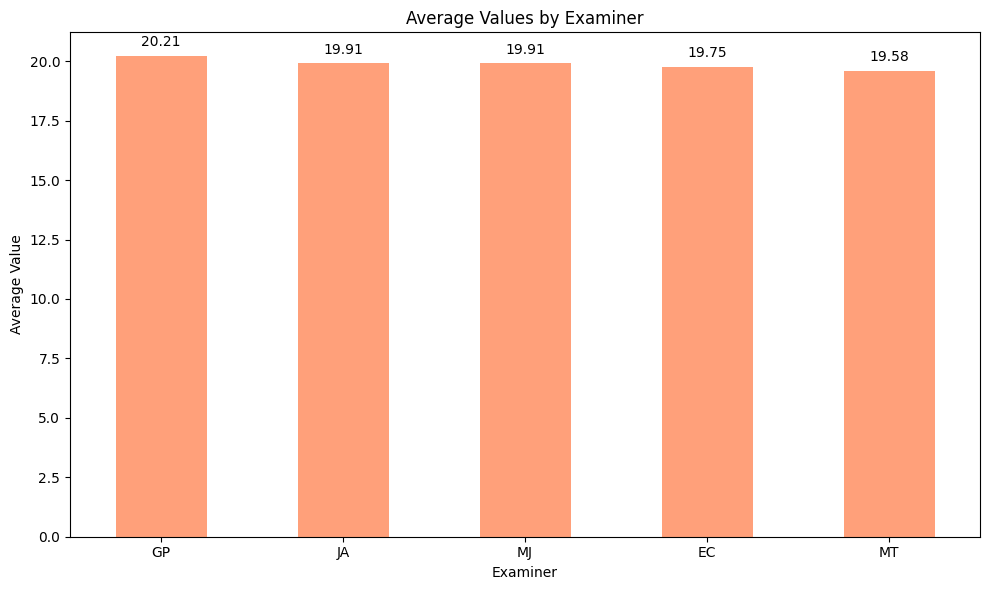

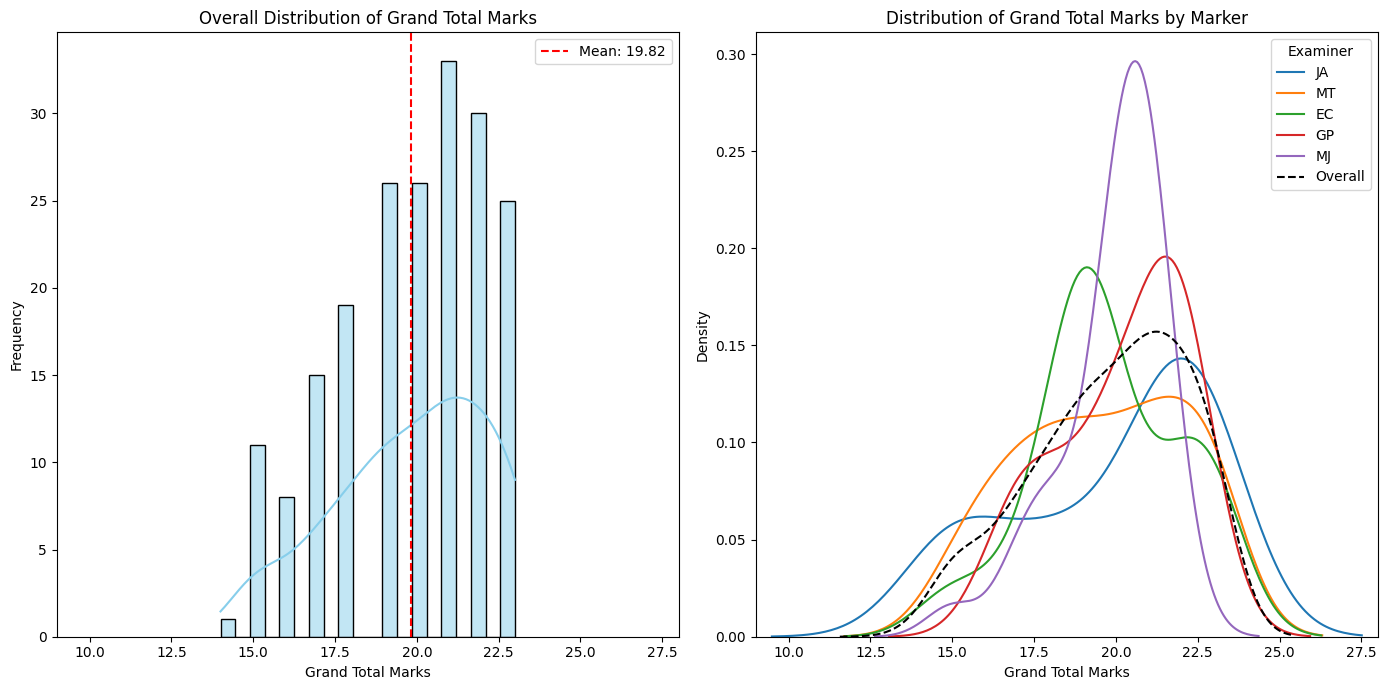

['JA' 'MT' 'EC' 'GP' 'MJ']


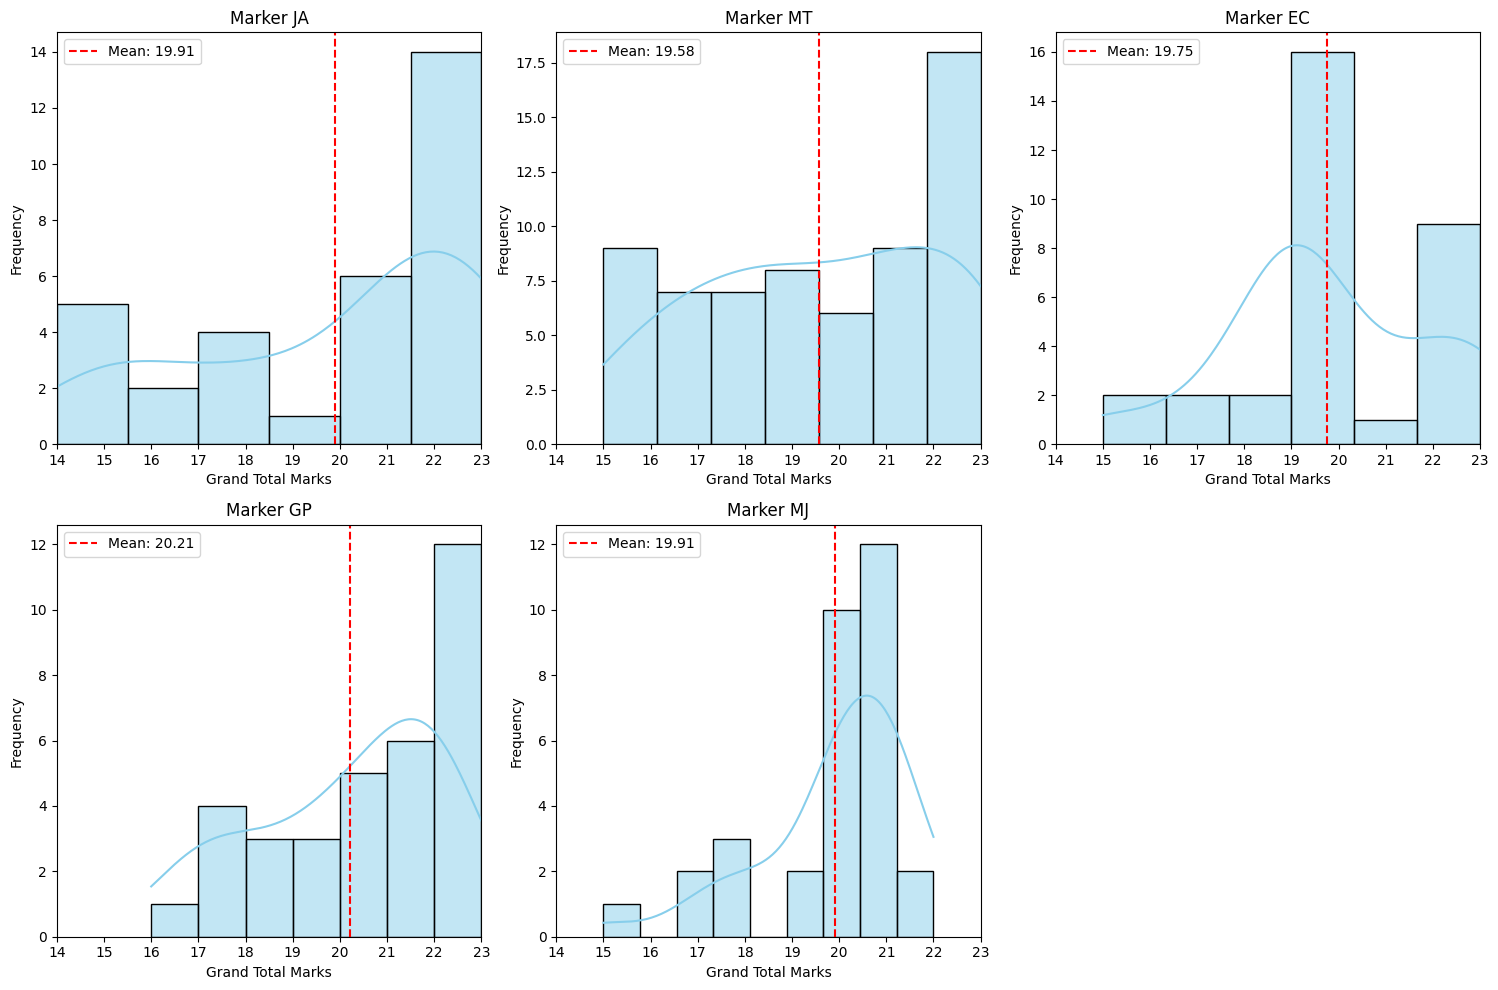

In [ ]:
# Overall aggregate, average of grand total for all
def plot_distribution(df, totalColumn='Grand Total'):
    df = df.iloc[:-1]
    overall_stats = {
        'Average': df[totalColumn].mean(),
        'Std': df[totalColumn].std()
    }
    marker_stats = df.groupby('Examiner')[totalColumn].agg(['mean', 'std', 'count']).rename(columns={'mean': 'Average', 'std': 'Std Deviation'})
    print(marker_stats)
    marker_stats = marker_stats.sort_values(by='Average', ascending=False)
    ax = marker_stats['Average'].plot(kind='bar', figsize=(10, 6), color='#FFA07A', rot=0)

    # Setting titles and labels
    plt.title('Average Values by Examiner')
    plt.xlabel('Examiner')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)  # Adjust the rotation if needed for better label visibility

    # Optional: Adding value annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to make room for label rotation if necessary
    plt.show()
    
    
    plt.figure(figsize=(14, 7))
    # Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[totalColumn], kde=True, color="skyblue", bins=20)
    plt.title('Overall Distribution of Grand Total Marks')
    plt.xlabel('Grand Total Marks')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.ylabel('Frequency')
    plt.axvline(df[totalColumn].mean(), color='r', linestyle='--', label=f"Mean: {overall_stats['Average']:.2f}")
    # plt.axvline(df[totalColumn].mean() + df[totalColumn].std(), color='g', linestyle='--', label=f"+1 Std Dev: {(df[totalColumn].mean() + df[totalColumn].std()):.2f}")
    # plt.axvline(df[totalColumn].mean() - df[totalColumn].std(), color='g', linestyle='--', label=f"-1 Std Dev: {(df[totalColumn].mean() - df[totalColumn].std()):.2f}")
    plt.legend()

    plt.subplot(1, 2, 2)
    for marker in df['Examiner'].unique():
        sns.kdeplot(df[df['Examiner'] == marker][totalColumn], label=marker)
    sns.kdeplot(df[totalColumn], color='black', label='Overall', linestyle='--')
    plt.title('Distribution of Grand Total Marks by Marker')
    plt.xlabel('Grand Total Marks')
    plt.ylabel('Density')
    plt.legend(title='Examiner')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.tight_layout()
    plt.show()

    markers = df['Examiner'].unique()
    print(markers)
    n_markers = len(markers)
    n_cols = 3
    n_rows = n_markers // n_cols + (n_markers % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, marker in enumerate(markers):
        ax = axs[i // n_cols, i % n_cols]
        sns.histplot(df[df['Examiner'] == marker][totalColumn], kde=True, color="skyblue", ax=ax)
        ax.set_title(f'Marker {marker}')
        ax.set_xlabel('Grand Total Marks')
        ax.set_ylabel('Frequency')
        ax.set_xlim(df[totalColumn].min(), df[totalColumn].max())
        # Add mean line
        ax.axvline(marker_stats.loc[marker, 'Average'], color='r', linestyle='--', label=f"Mean: {marker_stats.loc[marker, 'Average']:.2f}")
        ax.legend()

    # If the number of markers is not a multiple of the number of columns, hide the empty subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

plot_distribution(df, 'Grand Total MC')
plot_distribution(df, 'Grand Total')
# overall_stats, marker_stats

Examiner SB: 26
Examiner BB: 12
Examiner MM: 8
Examiner QT: 8
Examiner DM: 11
Examiner LJ: 25
Examiner ST: 12
Examiner SM: 14

In [ ]:
import pandas as pd
from collections import defaultdict
from itertools import combinations

# Sample DataFrame
# df = pd.DataFrame({
#     'StudentID': [1, 1, 2, 2, 3, 3, 4, 4],
#     'Examiner': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C']
# })

# Initialize dictionary to count pairs
pairCount = defaultdict(int)

# Get all unique students
allStudents = df['StudentID'].unique()

# Iterate over all students to get pairs of markers
for student in allStudents:
    # Get markers for the current student
    studentData = df[df['StudentID'] == student]
    markers = studentData['Examiner'].unique()
    
    # Generate all possible pairs of markers
    for pair in combinations(markers, 2):
        sortedPair = tuple(sorted(pair))
        pairCount[sortedPair] += 1

# Convert to DataFrame for easier display
pairCountDf = pd.DataFrame(pairCount.items(), columns=['MarkerPair', 'Count'])
pairCountDf    
# from IPython.display import display

# display(pairCountDf.style.hide(axis='index'))


,MarkerPair,Count
0,"(JA, MT)",18
1,"(EC, MT)",30
2,"(GP, MT)",16
3,"(GP, MJ)",18
4,"(JA, MJ)",14


In [ ]:
allMarkers = df['Examiner'].unique()
dictionary = {}


# Extract marker MJ
for marker in allMarkers:
    dfMJ = df[df['Examiner'] == marker]
    # print(dfMJ)
    MJStudents = dfMJ['StudentID'].unique()
    # print(MJStudents)
    # Now get data for MJ students from df
    dfMJStudents = df[df['StudentID'].isin(MJStudents)]
    # print(dfMJStudents)
    MJData = dfMJStudents[dfMJStudents['Examiner'] == marker]
    otherData = dfMJStudents[dfMJStudents['Examiner'] != marker]
    print(MJData['Examiner'].unique(), otherData['Examiner'].unique())

['JA'] ['MT' 'MJ']
['MT'] ['JA' 'EC' 'GP']
['EC'] ['MT']
['GP'] ['MT' 'MJ']
['MJ'] ['GP' 'JA']
[] []


In [ ]:
# df =df.drop(['534_R', '524_R', '534_ES', '534_PS', '534_TM', '524_ES', '524_PS', '524_TM'], axis=1)
def getWeighted(df):
    weights = [0.8, 0.1, 0.05, 0.05]
    
    cols_code1_mc = df.filter(regex=f'^{code1}_MC').columns
    cols_code2_mc = df.filter(regex=f'^{code2}_MC').columns
    cols_code1_tm = df.filter(regex=f'^{code1}_TM').columns
    cols_code2_tm = df.filter(regex=f'^{code2}_TM').columns
    cols_code1_es = df.filter(regex=f'^{code1}_ES').columns
    cols_code2_es = df.filter(regex=f'^{code2}_ES').columns
    cols_code1_ps = df.filter(regex=f'^{code1}_PS').columns
    cols_code2_ps = df.filter(regex=f'^{code2}_PS').columns
    print(len(cols_code1_mc), len(cols_code2_mc))
    # tmCols = df.filter(regex=f'^{code2}_TM|^{code1}_TM').columns
    # print(tmCols)
    # esCols = df.filter(regex=f'^{code2}_ES|^{code1}_ES').columns 
    # print(esCols)
    # psCols = df.filter(regex=f'^{code2}_PS|^{code1}_PS').columns
    # print(psCols)

    df[f'MC total'] = (df[cols_code1_mc].sum(axis=1)+ df[cols_code2_mc].sum(axis=1))
    df[f'MC %'] = (df['MC total']/(len(cols_code1_mc) + len(cols_code2_mc))*100).apply(lambda x: round(x, 2))
    df['Weighted'] = (df['MC %']/100*weights[0] + df[cols_code1_tm].sum(axis=1)/len(cols_code1_tm)*weights[1] + 
                    df[cols_code1_ps].sum(axis=1)*weights[2]/len(cols_code1_ps) + df[cols_code1_es].sum(axis=1)/len(cols_code1_es)*weights[3])*100
    df['Weighted'] = df['Weighted'].apply(lambda x: round(x, 2))
    # df[f'Weighted_{code1}'] = (df[cols_code1_mc].sum(axis=1)*weights[0]/len(cols_code1_mc) + 
    #                            df[cols_code1_tm].sum(axis=1)*weights[1]/len(cols_code1_tm) + 
    #                            df[cols_code1_es].sum(axis=1)*weights[2]/len(cols_code1_es) + 
    #                            df[cols_code1_ps].sum(axis=1)*weights[3]/len(cols_code1_ps))*100
    # df[f'Weighted_{code1}'] = df[f'Weighted_{code1}'].apply(lambda x: round(x, 2))
    
    # df[f'Weighted_{code2}'] = (df[cols_code2_mc].sum(axis=1)*weights[0]/len(cols_code2_mc) + 
    #                            df[cols_code2_tm].sum(axis=1)*weights[1]/3 + 
    #                            df[cols_code2_es].sum(axis=1)*weights[2]/4 + 
    #                            df[cols_code2_ps].sum(axis=1)*weights[3]/2)*100
    # df[f'Weighted_{code2}'] = df[f'Weighted_{code2}'].apply(lambda x: round(x, 2))

    # df['Weighted_average'] = (df[f'Weighted_{code1}'] + df[f'Weighted_{code2}'])/2
    # df['Weighted_average'] = df['Weighted_average'].apply(lambda x: round(x, 2))

    # # Penalize for critical errors by reducing the weighted score by 10%
    # # df['Weighted_average_penalty_10']= df[f'Weighted_average'] * df[f'{code1}_CE'].apply(lambda x: 0.9 if x == 'Yes' else 1.0)

    # # Penalize for critical errors by 20%
    df['Penalty_20']= df[f'Weighted'] * df[f'{code1}_CE'].apply(lambda x: 0.8 if x == 'Yes' else 1.0).apply(lambda x: round(x, 2))
    # # round the values
    # df[['Weighted_534', 'Weighted_524', 'Weighted_average', '534_penalty_10', '524_penalty_10', 'Weighted_average_penalty_10',
    #     '534_penalty_20', '524_penalty_20', 'Weighted_average_penalty_20']] = df[['Weighted_534', 'Weighted_524', 'Weighted_average', '534_penalty_10', '524_penalty_10', 'Weighted_average_penalty_10',
    #     '534_penalty_20', '524_penalty_20', 'Weighted_average_penalty_20']].round(2)

getWeighted(df_best)
comments = df_best.pop('Comments')
df_best['Comments'] = comments
# Filter out the 'Column Total' row
df_without_total = df_best[df_best.index != 'Column Total']

# Sort the dataframe without the 'Column Total' row
# df_without_total.sort_values(by='Penalty_20', ascending=False, inplace=True)

# Append the 'Column Total' row back to the sorted dataframe
# df_best = df_without_total.append(df_best.loc['Column Total'])
# df_best = pd.concat([df_without_total, df_best.loc['Column Total']], axis=0)
saveDf(df_best, f'{dir_name}/{file_name} filtered_best_penalty.xlsx', 'Best')
df_best.tail()


6 2
2 OR($Z2="Yes", $AA2="Yes")
3 OR($Z3="Yes", $AA3="Yes")
4 OR($Z4="Yes", $AA4="Yes")
5 OR($Z5="Yes", $AA5="Yes")
6 OR($Z6="Yes", $AA6="Yes")
7 OR($Z7="Yes", $AA7="Yes")
8 OR($Z8="Yes", $AA8="Yes")
9 OR($Z9="Yes", $AA9="Yes")
10 OR($Z10="Yes", $AA10="Yes")
11 OR($Z11="Yes", $AA11="Yes")
12 OR($Z12="Yes", $AA12="Yes")
13 OR($Z13="Yes", $AA13="Yes")
14 OR($Z14="Yes", $AA14="Yes")
15 OR($Z15="Yes", $AA15="Yes")
16 OR($Z16="Yes", $AA16="Yes")
17 OR($Z17="Yes", $AA17="Yes")
18 OR($Z18="Yes", $AA18="Yes")
19 OR($Z19="Yes", $AA19="Yes")
20 OR($Z20="Yes", $AA20="Yes")
21 OR($Z21="Yes", $AA21="Yes")
22 OR($Z22="Yes", $AA22="Yes")
23 OR($Z23="Yes", $AA23="Yes")
24 OR($Z24="Yes", $AA24="Yes")
25 OR($Z25="Yes", $AA25="Yes")
26 OR($Z26="Yes", $AA26="Yes")
27 OR($Z27="Yes", $AA27="Yes")
28 OR($Z28="Yes", $AA28="Yes")
29 OR($Z29="Yes", $AA29="Yes")
30 OR($Z30="Yes", $AA30="Yes")
31 OR($Z31="Yes", $AA31="Yes")
32 OR($Z32="Yes", $AA32="Yes")
33 OR($Z33="Yes", $AA33="Yes")
34 OR($Z34="Yes", $AA34="Yes

,577_TM-2,513_TM-3,577_PS-1,513_PS-2,513_PS-1,577_ES-1,513_ES-1,577_TM-3,577_TM-1,577_PS-2,513_TM-2,513_TM-1,513_MC6,513_MC4,513_ES-2,577_ES-2,513_MC5,513_MC1,513_MC2,513_ES-3,577_ES-3,577_MC2,577_MC1,513_MC3,513_CE,577_CE,Grand Total,MC total,MC %,Weighted,Penalty_20,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1377158,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,16.0,4.0,50.0,56.67,45.336,Large lingual deficiency\nMultiple porosities\...
1232770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,3.0,37.5,46.67,37.336,Large deficiencies at lingual and occlusal mar...
985199,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,3.0,37.5,46.67,37.336,Open lingual margin;\n\n Large lingual margina...
1113227,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,15.0,3.0,37.5,46.67,37.336,Large void mesial\nAnatomy inaccurate;\n\n Ver...
Column Total,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,93.0,93.0,85.0,80.0,72.0,72.0,72.0,65.0,55.0,48.0,NaN,NaN,NaN,600.0,7500.0,7908.33,7908.330,NaN


In [ ]:
df_best.head()

,577_TM-2,513_TM-3,577_PS-1,513_PS-2,513_PS-1,577_ES-1,513_ES-1,577_TM-3,577_TM-1,577_PS-2,513_TM-2,513_TM-1,513_MC6,513_MC4,513_ES-2,577_ES-2,513_MC5,513_MC1,513_MC2,513_ES-3,577_ES-3,577_MC2,577_MC1,513_MC3,513_CE,577_CE,Grand Total,MC total,MC %,Weighted,Penalty_20,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1221853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,No,24.0,8.0,100.0,100.0,100.0,Marginal ridge defect mid mesial;\n\n Fair att...
1399220,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,No,24.0,8.0,100.0,100.0,100.0,Slight MB excess\nML cusp high;\n\n Occlusal a...
1173233,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,No,24.0,8.0,100.0,100.0,100.0,Mesiolingual cusp bulky toward mesial;\n\n Gen...
1170848,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,No,24.0,8.0,100.0,100.0,100.0,Void mesiobuccal margin;\n\n Small M overhang\...
1387067,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,No,24.0,8.0,100.0,100.0,100.0,MB aspect of marginal ridge a bit bulky\nM ove...
